In [4]:
import pandas as pd
import numpy as np

In [5]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
data=pd.read_csv('sonar.csv')
data=pd.DataFrame(data=data)
data

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column52,Column53,Column54,Column55,Column56,Column57,Column58,Column59,Column60,Column61
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [12]:
X = data.iloc[:,:-1].values
X.shape

(208, 60)

In [11]:
Y=data.iloc[:,-1].values
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [3]:
data.shape

(208, 61)

In [8]:
data.describe()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58,Column59,Column60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
Column1     208 non-null float64
Column2     208 non-null float64
Column3     208 non-null float64
Column4     208 non-null float64
Column5     208 non-null float64
Column6     208 non-null float64
Column7     208 non-null float64
Column8     208 non-null float64
Column9     208 non-null float64
Column10    208 non-null float64
Column11    208 non-null float64
Column12    208 non-null float64
Column13    208 non-null float64
Column14    208 non-null float64
Column15    208 non-null float64
Column16    208 non-null float64
Column17    208 non-null float64
Column18    208 non-null float64
Column19    208 non-null float64
Column20    208 non-null float64
Column21    208 non-null float64
Column22    208 non-null float64
Column23    208 non-null float64
Column24    208 non-null float64
Column25    208 non-null float64
Column26    208 non-null float64
Column27    208 non-null float64
Colu

In [44]:
data.isnull().values.any()

False

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Column1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
Column2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
Column3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
Column4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
Column5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
Column6,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
Column7,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
Column8,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
Column9,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
Column10,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [13]:
data.isnull().sum()

Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
           ..
Column57    0
Column58    0
Column59    0
Column60    0
Column61    0
Length: 61, dtype: int64

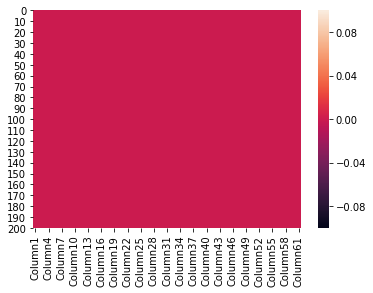

In [64]:
sns.heatmap(data.isnull())

In [65]:
lg=LogisticRegression()

In [66]:
lg.fit

<bound method LogisticRegression.fit of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [67]:
pred=lg.predict
pred

<bound method LinearClassifierMixin.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

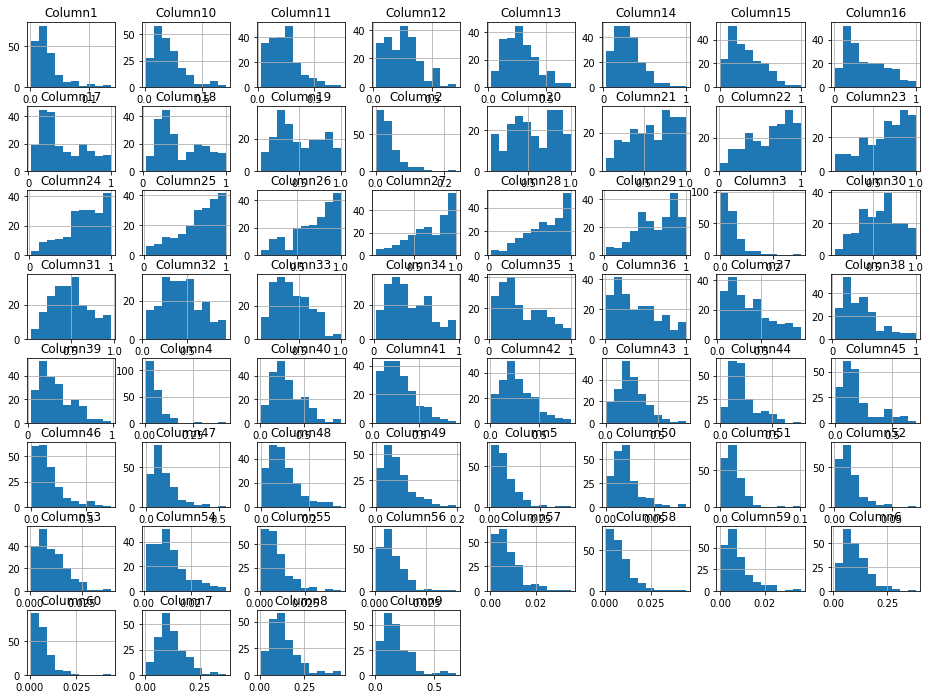

In [73]:
data.hist(figsize=(16,12));

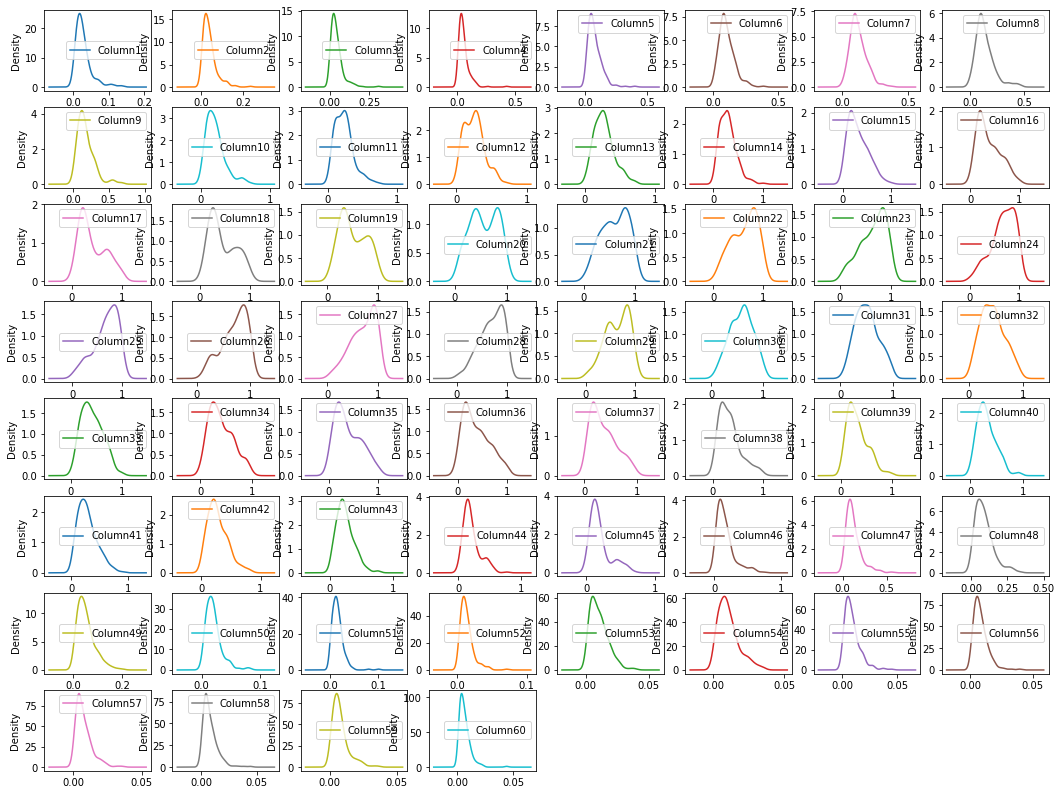

In [74]:
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, figsize=(18, 14));

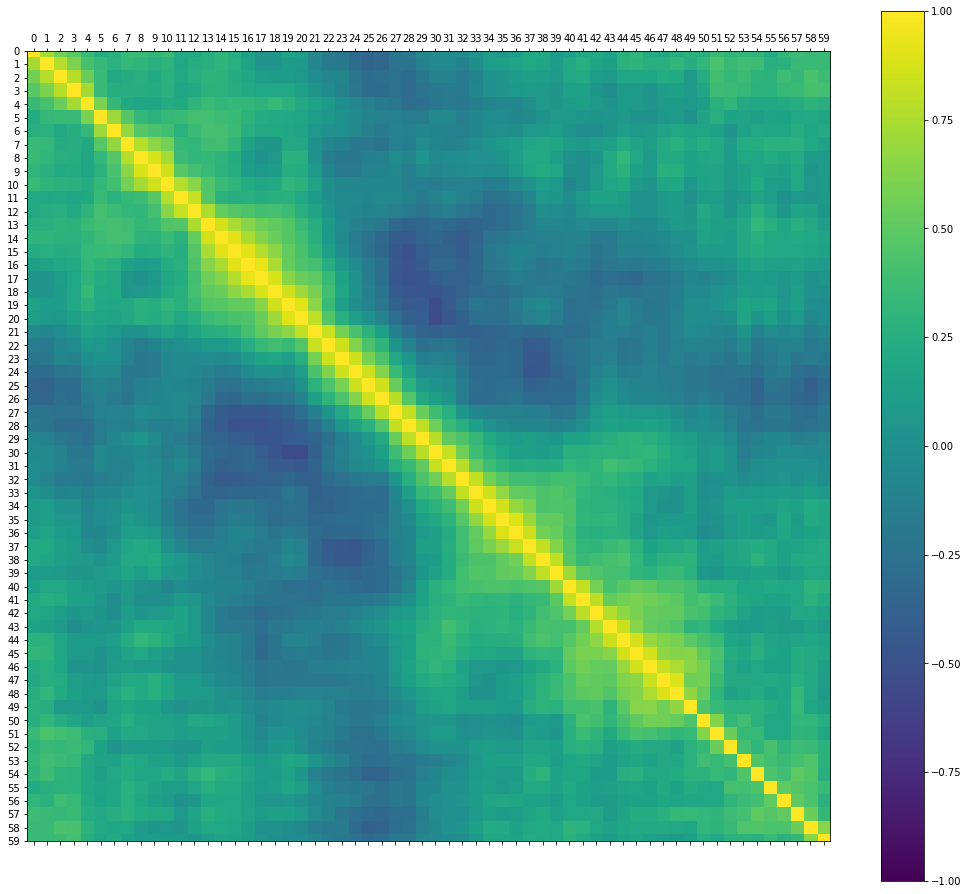

In [75]:
correlations = data.corr()
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 60, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [77]:
arr = data.values
X = arr[:,0:60]
y = arr[:,60]
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

LR: 76.94852941176471 (10.05102950966478)
LDA: 74.63235294117648 (11.785367885381074)
KNN: 80.80882352941175 (6.750704820308338)
CART: 69.33823529411765 (11.678452195164411)
NB: 64.88970588235294 (14.18684214516758)
SVM: 77.64705882352942 (9.041128152498237)


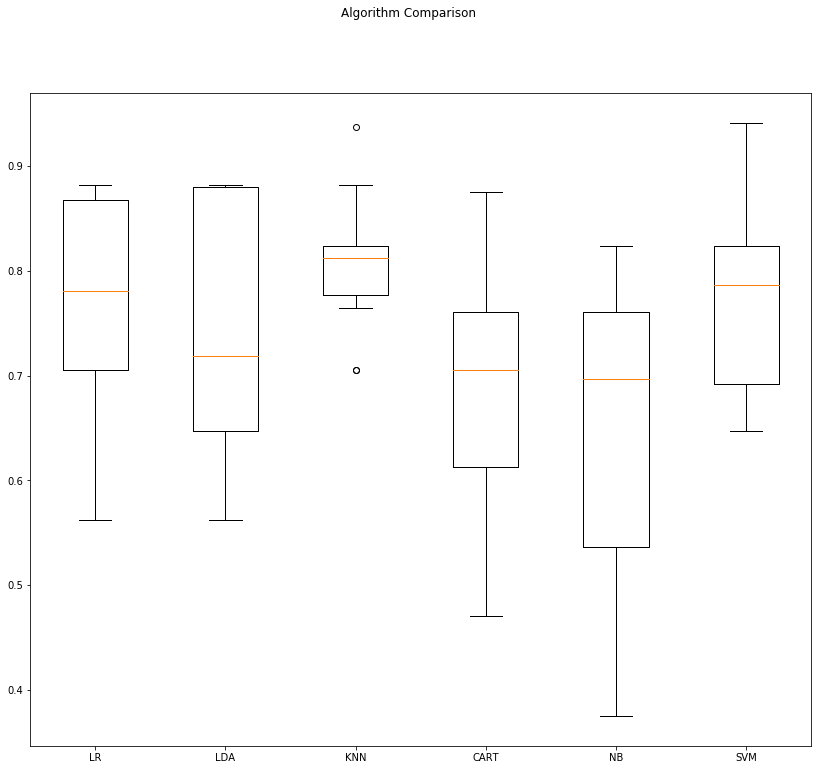

In [78]:

num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

def eval_algorithms(models, show_boxplots=True):
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        
    if show_boxplots:
        fig = plt.figure(figsize=(14,12)) 
        fig.suptitle('Algorithm Comparison') 
        ax = fig.add_subplot(111) 
        plt.boxplot(results) 
        ax.set_xticklabels(names) 
        plt.show()
        
eval_algorithms(models)

ScaledLR: 74.04411764705883 (9.466751140841813)
ScaledLDA: 74.63235294117648 (11.785367885381074)
ScaledKNN: 82.57352941176471 (5.451103821426657)
ScaledCART: 70.4779411764706 (8.701748447183604)
ScaledNB: 64.88970588235294 (14.18684214516758)
ScaledSVM: 83.63970588235293 (8.869747214968386)


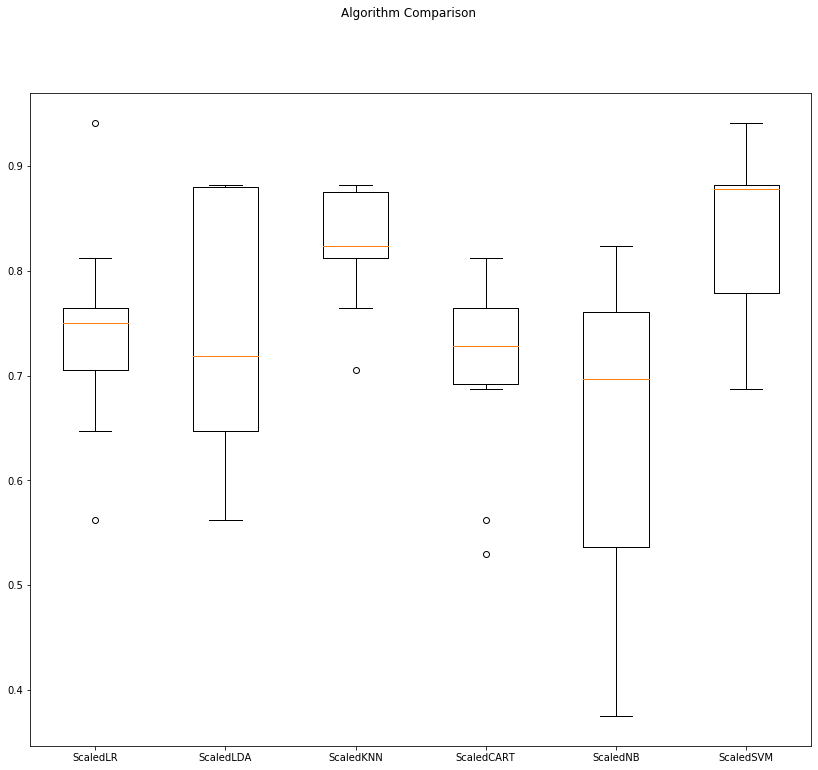

In [79]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='scale'))])))

eval_algorithms(pipelines)

In [80]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, Y_train)

# Print results
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.85 using {'n_neighbors': 1}
0.85 (0.05968577609876672) with: {'n_neighbors': 1}
0.8371323529411765 (0.06601389343386418) with: {'n_neighbors': 3}
0.8375 (0.03737725007982011) with: {'n_neighbors': 5}
0.7639705882352941 (0.0893737825672642) with: {'n_neighbors': 7}
0.7514705882352941 (0.08705087404087493) with: {'n_neighbors': 9}
0.7334558823529411 (0.104830998652816) with: {'n_neighbors': 11}
0.7330882352941176 (0.10580573208090603) with: {'n_neighbors': 13}
0.7279411764705882 (0.07614821756326462) with: {'n_neighbors': 15}
0.7099264705882353 (0.07928656388570995) with: {'n_neighbors': 17}
0.7220588235294118 (0.08508785913176035) with: {'n_neighbors': 19}
0.7102941176470587 (0.10950452661639593) with: {'n_neighbors': 21}


In [81]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.8661764705882353 using {'C': 1.5, 'kernel': 'rbf'}
0.7584558823529413 (0.09948301158200631) with: {'C': 0.1, 'kernel': 'linear'}
0.5294117647058824 (0.11882453042676783) with: {'C': 0.1, 'kernel': 'poly'}
0.5731617647058824 (0.1309303654500583) with: {'C': 0.1, 'kernel': 'rbf'}
0.7040441176470589 (0.06693297175243644) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.7463235294117647 (0.10950699524194979) with: {'C': 0.3, 'kernel': 'linear'}
0.6426470588235295 (0.13218739646981145) with: {'C': 0.3, 'kernel': 'poly'}
0.7658088235294118 (0.09169164818973898) with: {'C': 0.3, 'kernel': 'rbf'}
0.7349264705882353 (0.054566800193808336) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.7400735294117646 (0.08263557723261496) with: {'C': 0.5, 'kernel': 'linear'}
0.6801470588235293 (0.09859523701095135) with: {'C': 0.5, 'kernel': 'poly'}
0.788235294117647 (0.06418995518008062) with: {'C': 0.5, 'kernel': 'rbf'}
0.7466911764705882 (0.05874190108352445) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.7466911764705882